In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [126]:
from numpy.random import Generator, PCG64

class Bandit():
    """
    Bandit class will handle initiating, updating, and returning values from arms numbered distributions
    """
    
    # Initiate the k distribution parameters
    def __init__(self,arms):
        
        #Means[0,100]
        self.means = list(np.random.randint(low=0, high=100, size=arms))
        #Standard Deviation [0.1,5]
        self.stdev = list(np.random.randint(low=1, high=10, size=arms))
    
    # Update k distribution parameters
    def updateDistributions():
        pass
    
    # Generate random values based on a given input slot
    def pull(self,slot):
        
        generator = Generator(PCG64())
        output =  generator.normal(loc=self.means[slot], 
                                      scale=self.stdev[slot])
        
        return output
        

def banditDistributionPlot(bandit):
    """
    Visualize the bandit arm distribution with a violin plot
    """
    
    # Define shape and metrics of sampling
    ARMS = len(bandit.means)
    N = 1000
    valueArray = np.zeros((N,ARMS))

    
    # Generate Entries
    for i in range(ARMS):
        for j in range(N):
            valueArray[j,i] = bandit.pull(i)
    
    # Plot
    valueDF = pd.DataFrame(valueArray, columns=["Arm "+ str(i) for i in range(1, ARMS+1)])
    ax = plt.figure(figsize=(15,8))
    ax = sns.violinplot(data = valueDF)        

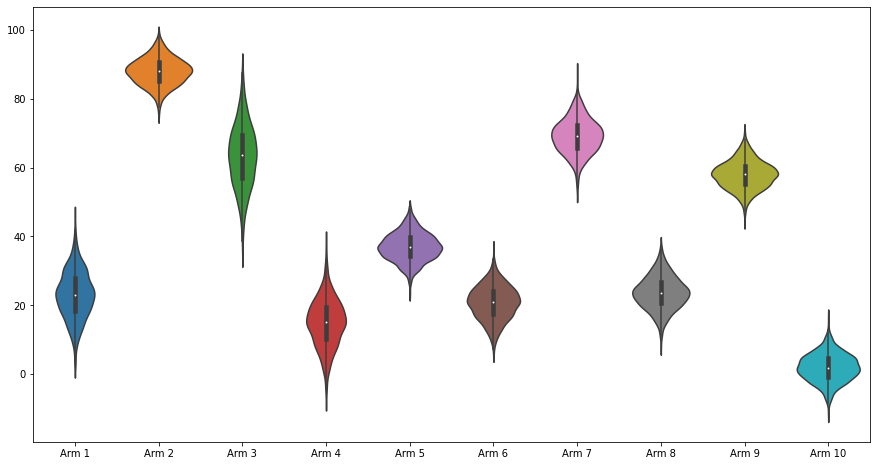

In [127]:
bandit = Bandit(10)      
banditDistributionPlot(bandit)

In [625]:
class EGreedyAgent():
    """
    A class that operates under the E-Greedy principles of exploitation/exploration
    """
    
    # Initialize variables
    def __init__(self, epsilon, arms):
        self.epsilon = epsilon
        self.arms = arms
        self.Ereward = np.zeros((arms))
        self.count = 0
    
    # Update policy based on learnings using incremental implementation
    def updatePolicy(self, value, arm):
        self.count += 1
        self.Ereward[arm] = self.Ereward[arm] + (1/self.count)*(value-self.Ereward[arm])
        
    
    # Select an arm
    def policy(self):
        
        RAND = np.random.rand()
        
        if RAND > self.epsilon:
            arm = np.argmax(self.Ereward)
            classification = "exploitation"
        else:
            arm = np.random.randint(0,self.arms)
            classification = "exploration"
            
        return arm, classification
        
    # Cycle agent through cycles of training 
    def run(self,bandit, cycles):
        
        output = []
        
        for i in range(cycles):
            
            # Select arm
            armSelected, classification = self.policy()
            
            # Generate a reward
            reward = bandit.pull(int(armSelected))

            # Update policy
            self.updatePolicy(reward, armSelected)
            
            # Store rewards
            output.append(reward)
        
        return output
            

        


In [627]:
agent = EGreedyAgent(0.2, 10)

# Check updatePolicy
print(agent.Ereward[5])
agent.updatePolicy(10, 5)
agent.updatePolicy(10, 5)
print(agent.Ereward[5])
print(agent.count)

# Check policy
#agent.Ereward[5]=10
arm = agent.policy()
print(arm)

# Check run
agent = EGreedyAgent(0.1, 10)
bandit = Bandit(10)
output = agent.run(bandit, 10000)
val =1
print(agent.Ereward)

0.0
10.0
2
(5, 'exploitation')
[-0.48830239 49.03283787  2.27109063  1.86403422  3.23247804  2.49707636
  3.38871918  6.40891777  0.96806596  1.43788908]
